In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['comment_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_youtube.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,comment_english,label
0,"['bang', 'list', 'tingal', 'waiting', 'telepho...",positive
1,"['region', 'different', 'different', 'price', '']",positive
2,"['nyimak', 'friend', 'success']",negative
3,"['village', '']",positive
4,"['bang', 'waiting', 'verification', 'call', '']",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment_english  3307 non-null   object
 1   label            3307 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


In [4]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,comment_english,label,polaritas
0,"['bang', 'list', 'tingal', 'waiting', 'telepho...",positive,1.0
1,"['region', 'different', 'different', 'price', '']",positive,1.0
2,"['nyimak', 'friend', 'success']",negative,-1.0
3,"['village', '']",positive,1.0
4,"['bang', 'waiting', 'verification', 'call', '']",positive,1.0
...,...,...,...
3302,"['cool', 'see', 'video', 'second']",positive,1.0
3303,"['signal', 'telkomsel', 'bad', 'region', 'plea...",positive,1.0
3304,"['pasuk', 'season', 'rain', 'net', 'telkomsel'...",positive,1.0
3305,"['comment', 'read', 'like', 'net', 'telkomsel'...",positive,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment_english  3307 non-null   object 
 1   label            3307 non-null   object 
 2   polaritas        3306 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.6+ KB


In [10]:
df.isna()

,comment_english,label,polaritas
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3302,False,False,False
3303,False,False,False
3304,False,False,False
3305,False,False,False


In [11]:
df.polaritas = df.polaritas.fillna(1)
df

,comment_english,label,polaritas
0,"['bang', 'list', 'tingal', 'waiting', 'telepho...",positive,1.0
1,"['region', 'different', 'different', 'price', '']",positive,1.0
2,"['nyimak', 'friend', 'success']",negative,-1.0
3,"['village', '']",positive,1.0
4,"['bang', 'waiting', 'verification', 'call', '']",positive,1.0
...,...,...,...
3302,"['cool', 'see', 'video', 'second']",positive,1.0
3303,"['signal', 'telkomsel', 'bad', 'region', 'plea...",positive,1.0
3304,"['pasuk', 'season', 'rain', 'net', 'telkomsel'...",positive,1.0
3305,"['comment', 'read', 'like', 'net', 'telkomsel'...",positive,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment_english  3307 non-null   object 
 1   label            3307 non-null   object 
 2   polaritas        3307 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.6+ KB


In [14]:
x = np.array(df['comment_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(3307,)
(3307,)


In [15]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(3307, 4570)


In [16]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (2645,)

 total data test :  (662,)


In [17]:
print(xtrain.shape)
print(ytrain.shape)

(2645, 4570)
(2645,)


In [18]:
#klasifikasi data (80 : 20)
nb = MultinomialNB()

#memasukkan data training ke dalam klasifikasi naive bayes
nbtrain = nb.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = nbtrain.predict(xtest)
predicted

array([-1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1

In [19]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(xtest)

array([[0.51044634, 0.48955366],
       [0.51240565, 0.48759435],
       [0.14823597, 0.85176403],
       ...,
       [0.21306339, 0.78693661],
       [0.50285405, 0.49714595],
       [0.38854508, 0.61145492]])

In [20]:
print(accuracy_score(ytest, predicted))

0.7583081570996979


In [21]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

        -1.0       0.86      0.35      0.50       227
         1.0       0.74      0.97      0.84       435

    accuracy                           0.76       662
   macro avg       0.80      0.66      0.67       662
weighted avg       0.78      0.76      0.72       662



In [22]:
Final = df[['comment_english', 'label', 'polaritas']]
Final = Final.rename(columns={'comment_english':'Comment', 'label':'Label', 'polaritas':'Polaritas'})
Final.to_excel('hasil_analisis_youtube.xlsx')

In [23]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[ 80, 147],
       [ 13, 422]], dtype=int64)

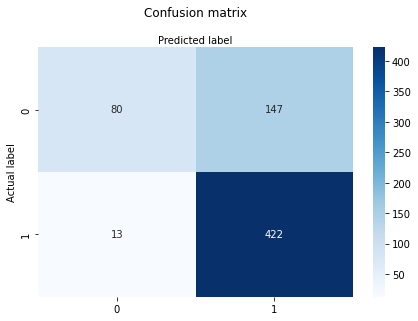

In [24]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
wordcloud = pd.Series(" ".join(df["comment_english"]).split())
len(wordcloud)

23520

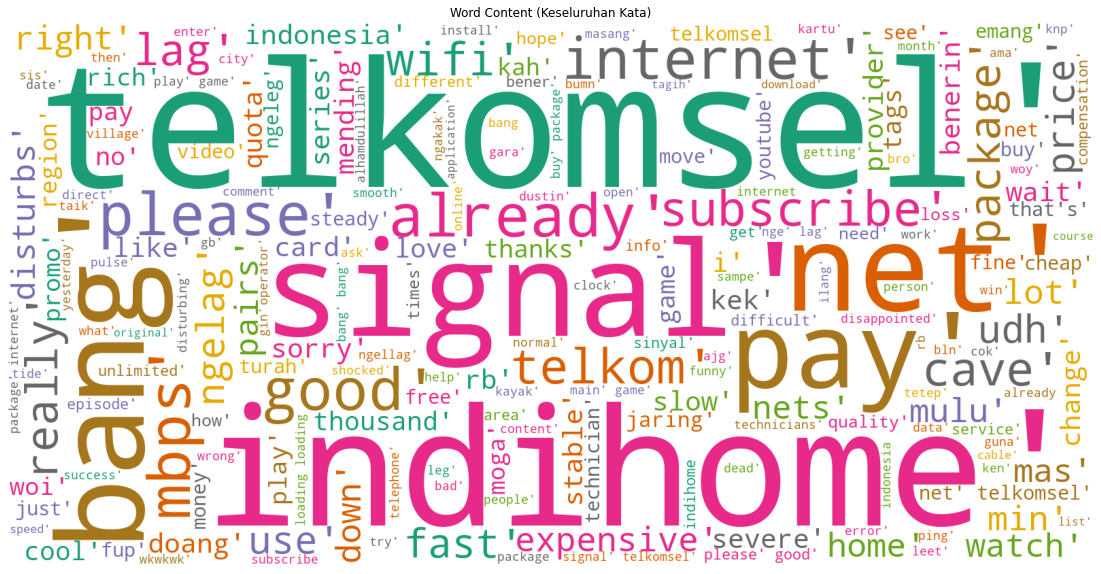

In [27]:
datacloud = " ".join(wordcloud)

%matplotlib inline
# Bigram (per dua kata) -> "collocations = True"
wordcloud_cld = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(datacloud)
plt.figure(figsize = (20, 10))
plt.title("Word Content (Keseluruhan Kata)")
plt.imshow(wordcloud_cld)
plt.axis("off")
plt.show()

In [28]:
label_score = df["label"].value_counts()
label_score

positive    2102
negative    1204
label          1
Name: label, dtype: int64

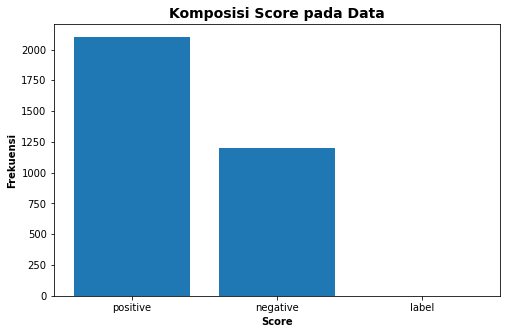

In [29]:
label_score_x = label_score.index
label_score_y = label_score.values

plt.figure(figsize = (8, 5))
plt.bar(label_score_x, label_score_y)
plt.xlabel("Score", fontweight = 'bold')
plt.ylabel("Frekuensi", fontweight = 'bold')
plt.title("Komposisi Score pada Data", fontweight = 'bold', fontsize = 14)
plt.show()

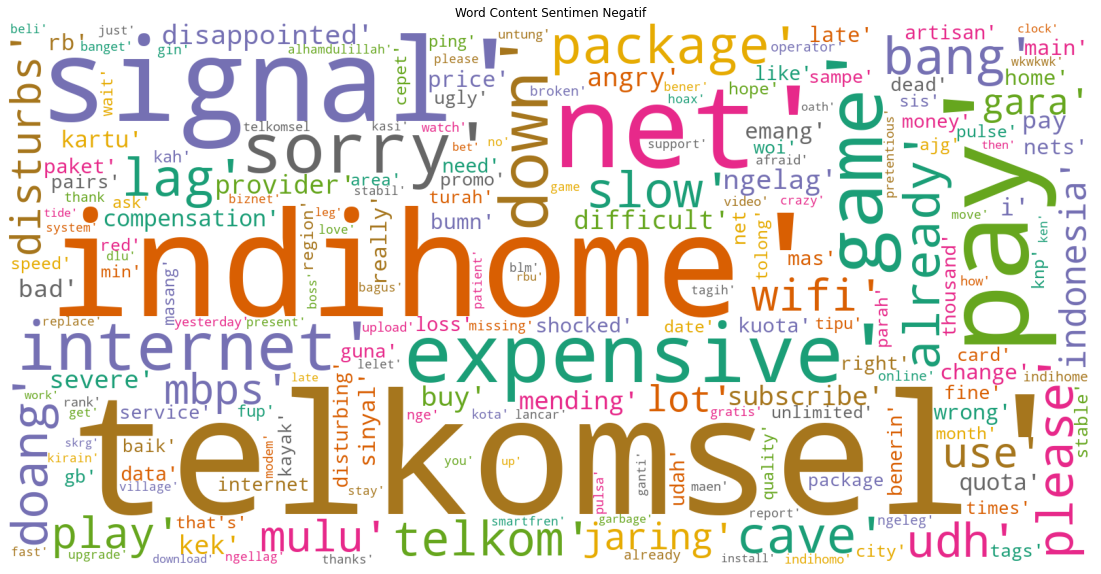

In [31]:
word_negatif = pd.Series(" ".join(df[df["polaritas"]== -1] ["comment_english"]).split())
data_negatif = " ".join(word_negatif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Negatif")
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

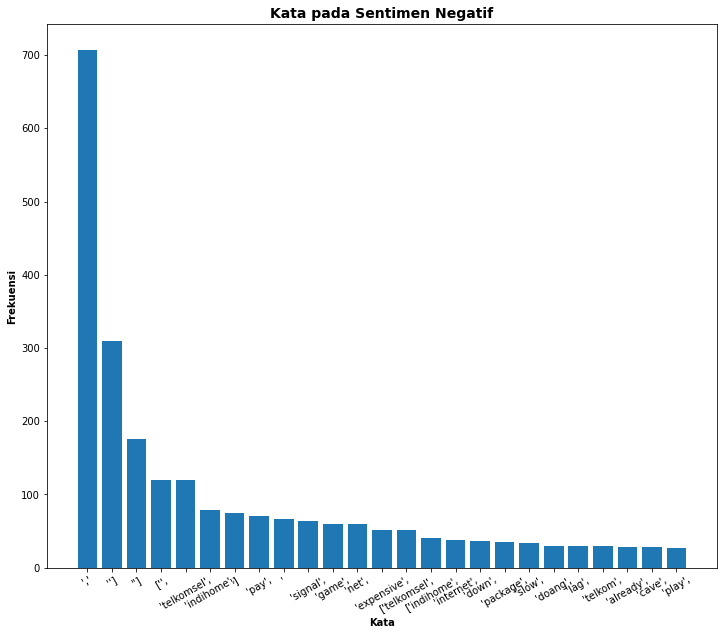

In [32]:
negatif_kata = word_negatif.value_counts().nlargest(25)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)
plt.xticks(negatif_x, rotation = 30)
plt.show()

In [33]:
negatif_score = word_negatif.value_counts()
negatif_score

','             707
'']             309
"]              175
['',            120
'telkomsel',    119
               ... 
'basssiiii',      1
['naah',          1
'pda',            1
'wfh',            1
name              1
Length: 3510, dtype: int64

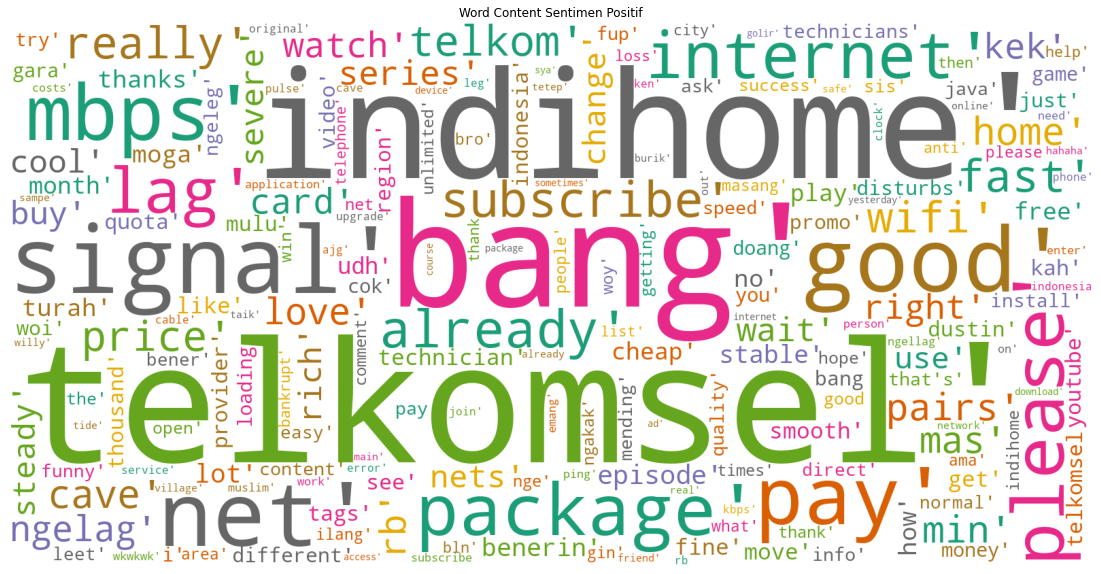

In [34]:
word_positif = pd.Series(" ".join(df[df["polaritas"]== 1] ["comment_english"]).split())
data_positif = " ".join(word_positif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Positif")
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

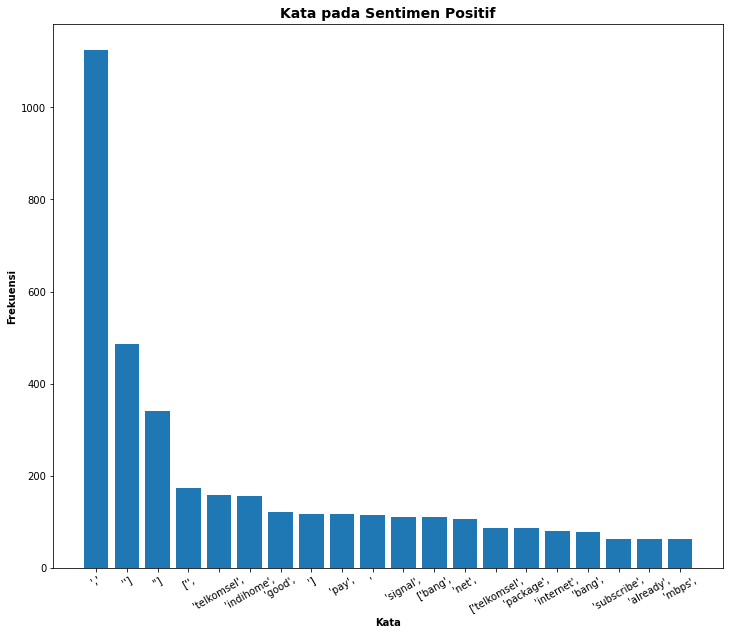

In [35]:
positif_kata = word_positif.value_counts().nlargest(20)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Positif", fontweight ='bold', fontsize = 14)
plt.xticks(positif_x, rotation = 30)
plt.show()

In [36]:
positif_score = word_positif.value_counts()
positif_score

','             1125
'']              487
"]               341
['',             172
'telkomsel',     158
                ... 
'olya',            1
'yulya',           1
progress',         1
['salu',           1
'tot']             1
Length: 4685, dtype: int64

In [37]:
ytrain = ytrain.value_counts()
ytrain

 1.0    1668
-1.0     977
Name: polaritas, dtype: int64

In [38]:
ytest = ytest.value_counts()
ytest

 1.0    435
-1.0    227
Name: polaritas, dtype: int64